<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

## 3. Exploratory Data Analysis

### 3.1 Importing required libraries

In [0]:
# For faster computations using numpy array
import numpy as np
# For maintaing data in dataframes
import pandas as pd
# For plotting graphs
import matplotlib.pyplot as plt
# For visualizing and plotting stats
import seaborn as sbrn
# For extracting advanced features
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
# For calculating lcs value
!pip install distance
import distance


# For getting stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# For using stopwords in pre-processsing
from nltk.corpus import stopwords
# For converting text into tokens
from nltk.tokenize import word_tokenize
# For stemming
from nltk.stem import PorterStemmer
# For html parsing
from bs4 import BeautifulSoup
# Useful in preprocessing
import re
# For making wordcloud
from wordcloud import WordCloud
# For standardizing data
from sklearn.preprocessing import MinMaxScaler

# For visualizing data in lower dimensions
from sklearn.manifold import TSNE
# For plotting 3-D Plot
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

# For feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# For word embeddings
import spacy
# For scores, splitting and other stuff
from sklearn import model_selection
# For operating on sparse data
from scipy.sparse import coo_matrix, hstack
# For using logistic regression
from sklearn.linear_model import LogisticRegression
# For using svm classifer - hinge loss function of sgd
from sklearn import linear_model
# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# For getting probability scores
from sklearn.calibration import CalibratedClassifierCV
# For plotting confusion matrix
from sklearn.metrics import confusion_matrix
# For metrics evaluation
from sklearn.metrics.classification import accuracy_score, log_loss
# For using xgboost classifier
import xgboost as xgb

# For reading data from a file present in google drive
from google.colab import drive
# For tracking the progress of the execution
from tqdm import tqdm_notebook as tqdm
# For ignoring warnings
import warnings

drive.mount('/content/drive/');
warnings.filterwarnings('ignore');

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


     |████████████████████████████████| 184kB 2.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### 3.2 Reading data

In [0]:
totalData = pd.read_csv('drive/My Drive/train.csv');
usingData = totalData.copy()
usingData.head(5)

id  qid1  ...                                          question2 is_duplicate
0   0     1  ...  What is the step by step guide to invest in sh...            0
1   1     3  ...  What would happen if the Indian government sto...            0
2   2     5  ...  How can Internet speed be increased by hacking...            0
3   3     7  ...  Find the remainder when [math]23^{24}[/math] i...            0
4   4     9  ...            Which fish would survive in salt water?            0

[5 rows x 6 columns]

### 3.3 Basic stats and processing

In [0]:
usingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


As you can see there are 2 null objects in question2 and 1 null object in question 1

In [0]:
# Getting null data points
usingData[usingData.isnull().any(axis=1)]

id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]

In [0]:
# Replacing nan points
usingData.fillna('', inplace = True);
usingData.shape

(404290, 6)

In [0]:
usingData.iloc[105780]

id                                      105780
qid1                                    174363
qid2                                    174364
question1       How can I develop android app?
question2                                     
is_duplicate                                 0
Name: 105780, dtype: object

#### 3.3.1 Distribution of data points based on 'is_duplicate'(binary classes)

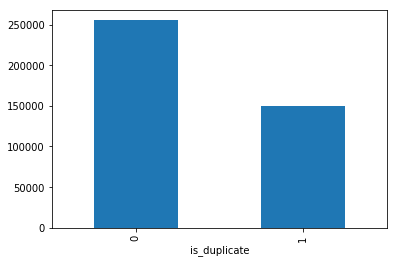

In [0]:
usingData.groupby('is_duplicate')['id'].count().plot.bar()

In [0]:
print("Total number of question pairs: ", usingData.shape[0]);
print("Percentage of non-duplicate question pairs ", (usingData[usingData['is_duplicate'] == 0].shape[0] / usingData.shape[0])*100, '%');
print("Number of duplicate question pairs ", (usingData[usingData['is_duplicate'] == 1].shape[0] / usingData.shape[0])*100, '%');

Total number of question pairs:  404290
Percentage of non-duplicate question pairs  63.08021469737069 %
Number of duplicate question pairs  36.9197853026293 %


#### 3.3.2 Unique Questions

In [0]:
questionIds = pd.Series(usingData['qid1'].tolist() + usingData['qid2'].tolist());
uniqueQuestions = np.unique(questionIds);
numUniqueQuestionsRepeated = np.sum(questionIds.value_counts() > 1) 
print('Number of unique questions: ', len(uniqueQuestions));
print('Number of unique questions repeated: ', numUniqueQuestionsRepeated);

Number of unique questions:  537933
Number of unique questions repeated:  111780


#### 3.3.3 Checking duplicate pair questions

In [0]:
numDuplicatePairs = usingData[['qid1', 'qid2', 'is_duplicate']].groupby(['qid1', 'qid2']).count().reset_index();
print("Number of duplicate pairs: ", len(numDuplicatePairs) - len(numDuplicatePairs));

Number of duplicate pairs:  0


### 3.3.4 Number of occurences of each question

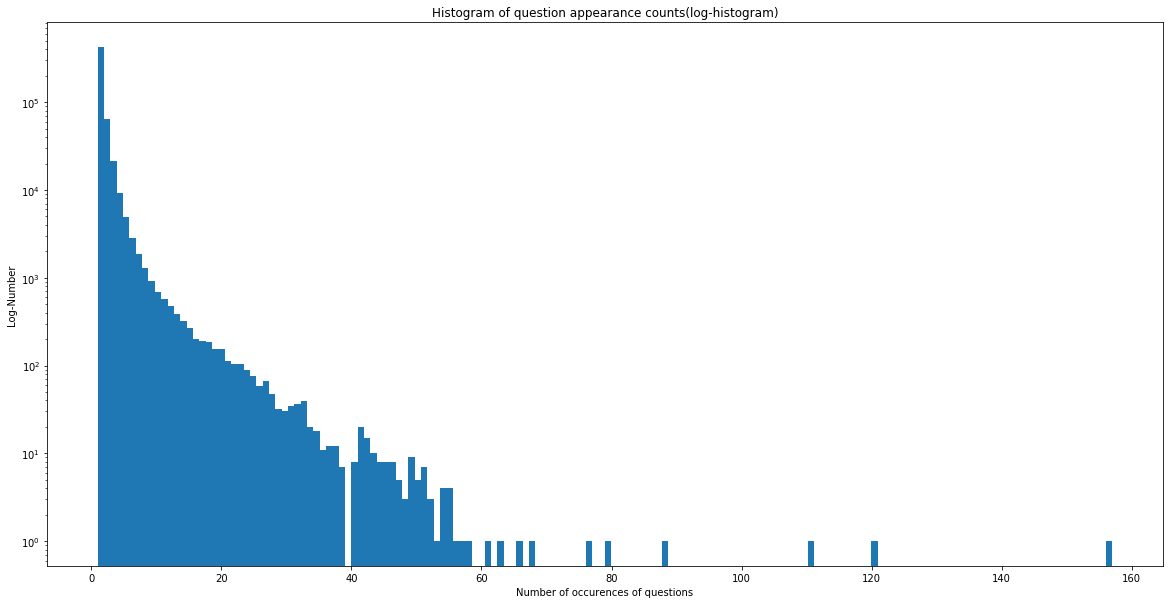

In [0]:
plt.figure(figsize=(20, 10))
plt.hist(questionIds.value_counts(), bins = 160);
plt.yscale("log", nonposy = 'clip');
plt.title("Histogram of question appearance counts(log-histogram)");
plt.xlabel("Number of occurences of questions");
plt.ylabel("Log-Number");

<h2>3.4 Basic Feature Extraction (before cleaning) </h2>

#### 3.4.1 Taking only first 1,00,000 data points

In [0]:
# processingData = usingData.iloc[0:100000]
# processingData.shape
processingData = usingData.copy()

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [0]:
processingData['freq_qid1'] = processingData.groupby('qid1')['qid1'].transform('count');
processingData['freq_qid2'] = processingData.groupby('qid2')['qid2'].transform('count');
processingData['q1len'] = processingData.apply(lambda dataPoint: len(dataPoint['question1']), axis = 1);
processingData['q1len'] = processingData.apply(lambda dataPoint: len(dataPoint['question2']), axis = 1);
processingData['q1_n_words'] = processingData.apply(lambda dataPoint: len(dataPoint['question1'].split()), axis = 1);
processingData['q2_n_words'] = processingData.apply(lambda dataPoint: len(dataPoint['question2'].split()), axis = 1);

def compute_word_common(dataPoint):
  return float(len(set(dataPoint['question1'].lower().strip().split()) & set(dataPoint['question2'].lower().strip().split())))

def compute_word_total(dataPoint):
  return float(len(dataPoint['question1'].lower().strip().split() + dataPoint['question2'].lower().strip().split()))

def compute_word_share(dataPoint):
  return compute_word_common(dataPoint) / compute_word_total(dataPoint);

processingData['word_common'] = processingData.apply(lambda dataPoint: compute_word_common(dataPoint), axis = 1);
processingData['word_total'] = processingData.apply(lambda dataPoint: compute_word_total(dataPoint), axis = 1);
processingData['word_share'] = processingData.apply(lambda dataPoint: compute_word_share(dataPoint), axis = 1);
processingData['sum_freq'] = processingData.apply(lambda dataPoint: dataPoint['freq_qid1'] + dataPoint['freq_qid2'], axis = 1);
processingData['diff_freq'] = processingData.apply(lambda dataPoint: abs(dataPoint['freq_qid1'] - dataPoint['freq_qid2']), axis = 1);

In [0]:
processingData.head(4)

id  qid1  qid2  ... word_share sum_freq  diff_freq
0   0     1     2  ...   0.384615        2          0
1   1     3     4  ...   0.190476        5          3
2   2     5     6  ...   0.166667        2          0
3   3     7     8  ...   0.000000        2          0

[4 rows x 16 columns]

#### 3.4.2 Analysis of some extracted features

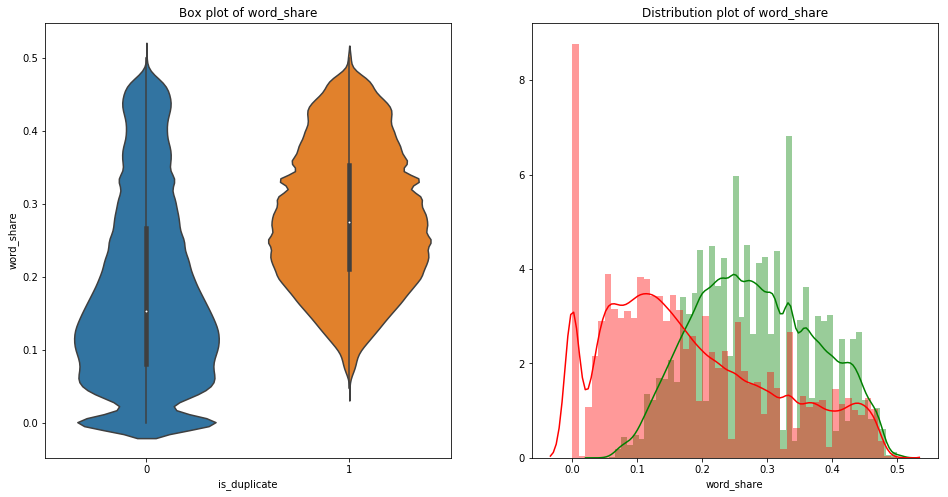

In [0]:
plt.figure(figsize=(16, 8));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'word_share', data = processingData[0:]);
plt.title('Box plot of word_share');
plt.subplot(1, 2, 2);
sbrn.distplot(processingData[processingData['is_duplicate'] == 1]['word_share'][0:], label = '1', color = 'green');
sbrn.distplot(processingData[processingData['is_duplicate'] == 0]['word_share'][0:], label = '0', color = 'red');
plt.title('Distribution plot of word_share');
plt.show();

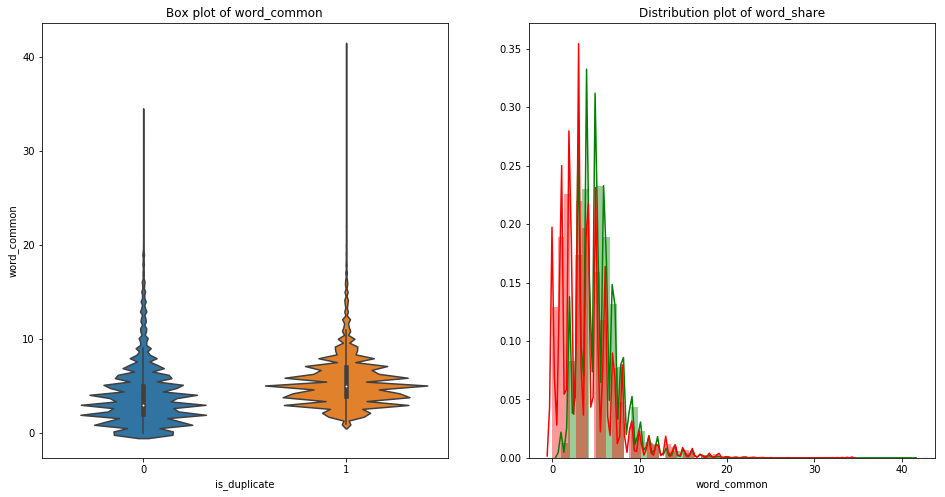

In [0]:
plt.figure(figsize=(16, 8));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'word_common', data = processingData[0:]);
plt.title('Box plot of word_common');
plt.subplot(1, 2, 2);
sbrn.distplot(processingData[processingData['is_duplicate'] == 1]['word_common'][0:], label = '1', color = 'green');
sbrn.distplot(processingData[processingData['is_duplicate'] == 0]['word_common'][0:], label = '0', color = 'red');
plt.title('Distribution plot of word_share');
plt.show();

In [0]:
plt.figure(figsize=(14, 10));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'word_share', data = processingData[0:]);
plt.subplot(1, 2, 2);
sbrn.distplot(processingData[processingData['is_duplicate'] == 1]['word_share'][0:], label = '1', color = 'green');
sbrn.distplot(processingData[processingData['is_duplicate'] == 0]['word_share'][0:], label = '0', color = 'red');
plt.show();

## 3.5 Pre-Processing Text

Preprocessing:
1. Removing html tags
2. Removing Punctuations
3. Performing stemming
4. Removing Stopwords
5. Expanding contractions etc..

In [0]:
SAFE_DIV = 0.0001
stopWords = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()
    text = text.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    text = re.sub(r"([0-9]+)000000", r"\1m", text)
    text = re.sub(r"([0-9]+)000", r"\1k", text)
    
    
    stemmer = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(text) == type(''):
        text = re.sub(pattern, ' ', text)
    
    
    if type(text) == type(''):
        text = stemmer.stem(text)
        htmlParsedText = BeautifulSoup(text)
        text = htmlParsedText.get_text()
    
    return text;

In [0]:
processingData["question1"] = processingData["question1"].fillna("").apply(preprocess)
processingData["question2"] = processingData["question2"].fillna("").apply(preprocess)

In [0]:
preProcessedQuestions1WithStopWords = [];
preProcessedQuestions1WithOutStopWords = [];
preProcessedQuestions2WithStopWords = [];
preProcessedQuestions2WithOutStopWords = [];
for i, dataPoint in tqdm(processingData.iterrows()):
  preProcessedText = preprocess(dataPoint['question1']);
  preProcessedQuestions1WithStopWords.append(preProcessedText[0]);
  preProcessedQuestions1WithOutStopWords.append(preProcessedText[1]);
  
  preProcessedText = preprocess(dataPoint['question2']);
  preProcessedQuestions2WithStopWords.append(preProcessedText[0]);
  preProcessedQuestions2WithOutStopWords.append(preProcessedText[1]);

## 3.6 Advanced Feature Extraction

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [0]:
def getLongestSubstrRatio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1);
      
def extractAdvancedFeatures(question1, question2):
  
  q1Tokens = question1.split();
  q2Tokens = question2.split();
  
  if len(q1Tokens) == 0 or len(q2Tokens) == 0:
        return [0.0]*15;
  
  q1Words = set([token for token in q1Tokens if token not in stopWords])
  q2Words = set([token for token in q2Tokens if token not in stopWords])
  
  q1StopWords = set([token for token in q1Tokens if token in stopWords])
  q2StopWords = set([token for token in q2Tokens if token in stopWords])
  
  commonWordCount = len(q1Words & q2Words);
  commonStopWordCount = len(q1StopWords & q2StopWords);
  commonTokenCount = len(set(q1Tokens) & set(q2Tokens));
  
  cwc_min = commonWordCount/(min(len(q1Words), len(q2Words)) + SAFE_DIV);
  cwc_max = commonWordCount/(max(len(q1Words), len(q2Words)) + SAFE_DIV);
  csc_min = commonStopWordCount/(min(len(q1StopWords), len(q2StopWords)) + SAFE_DIV);
  csc_max = commonStopWordCount/(max(len(q1StopWords), len(q2StopWords)) + SAFE_DIV);
  ctc_min = commonTokenCount/(min(len(q1Tokens), len(q2Tokens)) + SAFE_DIV);
  ctc_max = commonTokenCount/(max(len(q1Tokens), len(q2Tokens)) + SAFE_DIV);
  lastWordEq = int(q1Tokens[-1] == q2Tokens[-1]);
  firstWordEq = int(q1Tokens[0] == q2Tokens[0]);
  absLenDiff = abs(len(q1Tokens) - len(q2Tokens));
  meanLen = (len(q1Tokens) + len(q2Tokens))/2;
  fuzzRatio = fuzz.QRatio(question1, question2);
  fuzzPartialRatio = fuzz.partial_ratio(question1, question2);
  fuzzTokenSortRatio = fuzz.token_sort_ratio(question1, question2);
  fuzzTokenSetRatio = fuzz.token_set_ratio(question1, question2);
  longestSubStrRatio = getLongestSubstrRatio(question1, question2);
  
  advancedFeatures = (cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, lastWordEq, firstWordEq, absLenDiff, meanLen,\
                      fuzzRatio, fuzzPartialRatio, fuzzTokenSortRatio, fuzzTokenSetRatio, longestSubStrRatio);
  return advancedFeatures;

In [0]:
processingData[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',\
               'abs_len_diff', 'mean_len', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'longest_substr_ratio']]\
= processingData.apply(lambda x: pd.Series(extractAdvancedFeatures(x['question1'], x['question2'])), axis = 1);

In [0]:
preProcessedData = pd.read_csv('drive/My Drive/data_with_all_features.csv');

### 3.6.1 Analysis of advanced extracted features

In [0]:
duplicatedData = preProcessedData[preProcessedData['is_duplicate'] == 1]
nonDuplicatedData = preProcessedData[preProcessedData['is_duplicate'] == 0]

print('Number of duplicated data points: ', duplicatedData.shape[0]);
print('Number of non-duplicated data points: ', nonDuplicatedData.shape[0]);

duplicatedDataText = []
nonDuplicatedDataText = []
for i, dataPoint in duplicatedData.iterrows():
  duplicatedDataText.extend(str(dataPoint['question1']).split() + str(dataPoint['question2']).split());
for i, dataPoint in nonDuplicatedData.iterrows():
  nonDuplicatedDataText.extend(str(dataPoint['question1']).split() + str(dataPoint['question2']).split());
print('Number of words in duplicate pair questions: ', len(duplicatedDataText));
print('Number of words in non-duplicate pair questions: ', len(nonDuplicatedDataText));

stopWords = set(stopwords.words('english'))
stopWords.add("said")
stopWords.add("br")
stopWords.add(" ")
stopWords.remove("not");
stopWords.remove("no");

Number of duplicated data points:  149263
Number of non-duplicated data points:  255027
Number of words in duplicate pair questions:  2978064
Number of words in non-duplicate pair questions:  6124645


#### 3.6.1.1 WordCloud of duplicate pair questions

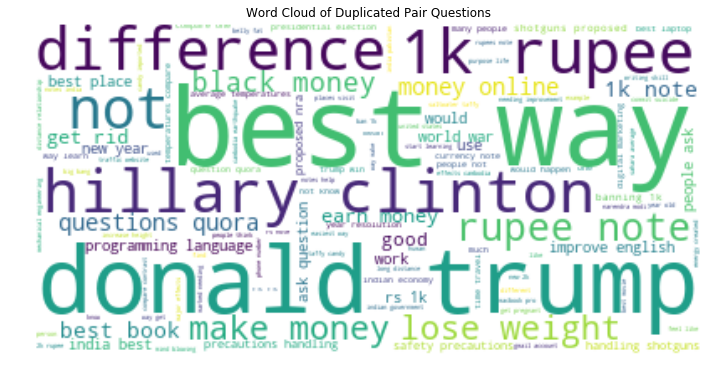

In [0]:
wordcloud = WordCloud(stopwords = stopWords, max_words = len(duplicatedDataText), background_color = 'white');
wordcloud.generate(' '.join(duplicatedDataText));
plt.figure(figsize = (12, 12));
plt.imshow(wordcloud, interpolation = 'bilinear');
plt.axis('off');
plt.title("Word Cloud of Duplicated Pair Questions");
plt.show()

### 3.6.1.2 Word Cloud of non-duplicated pair questions

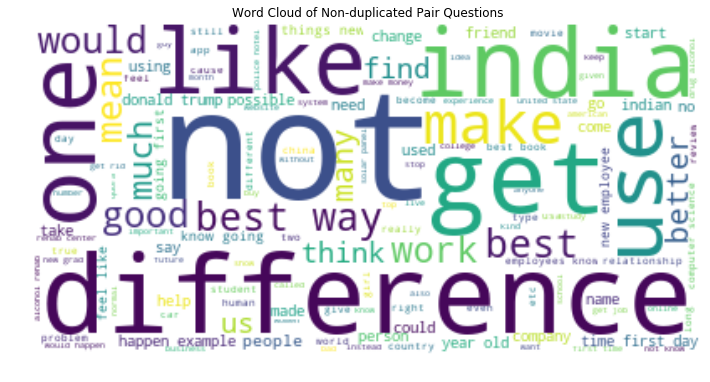

In [0]:
wordcloud = WordCloud(stopwords = stopWords, max_words = len(nonDuplicatedDataText), background_color = 'white');
wordcloud.generate(' '.join(nonDuplicatedDataText));
plt.figure(figsize = (12, 12));
plt.imshow(wordcloud, interpolation = 'bilinear');
plt.axis('off');
plt.title("Word Cloud of Non-duplicated Pair Questions");
plt.show()

### 3.6.1.3 Pair plot of important token features

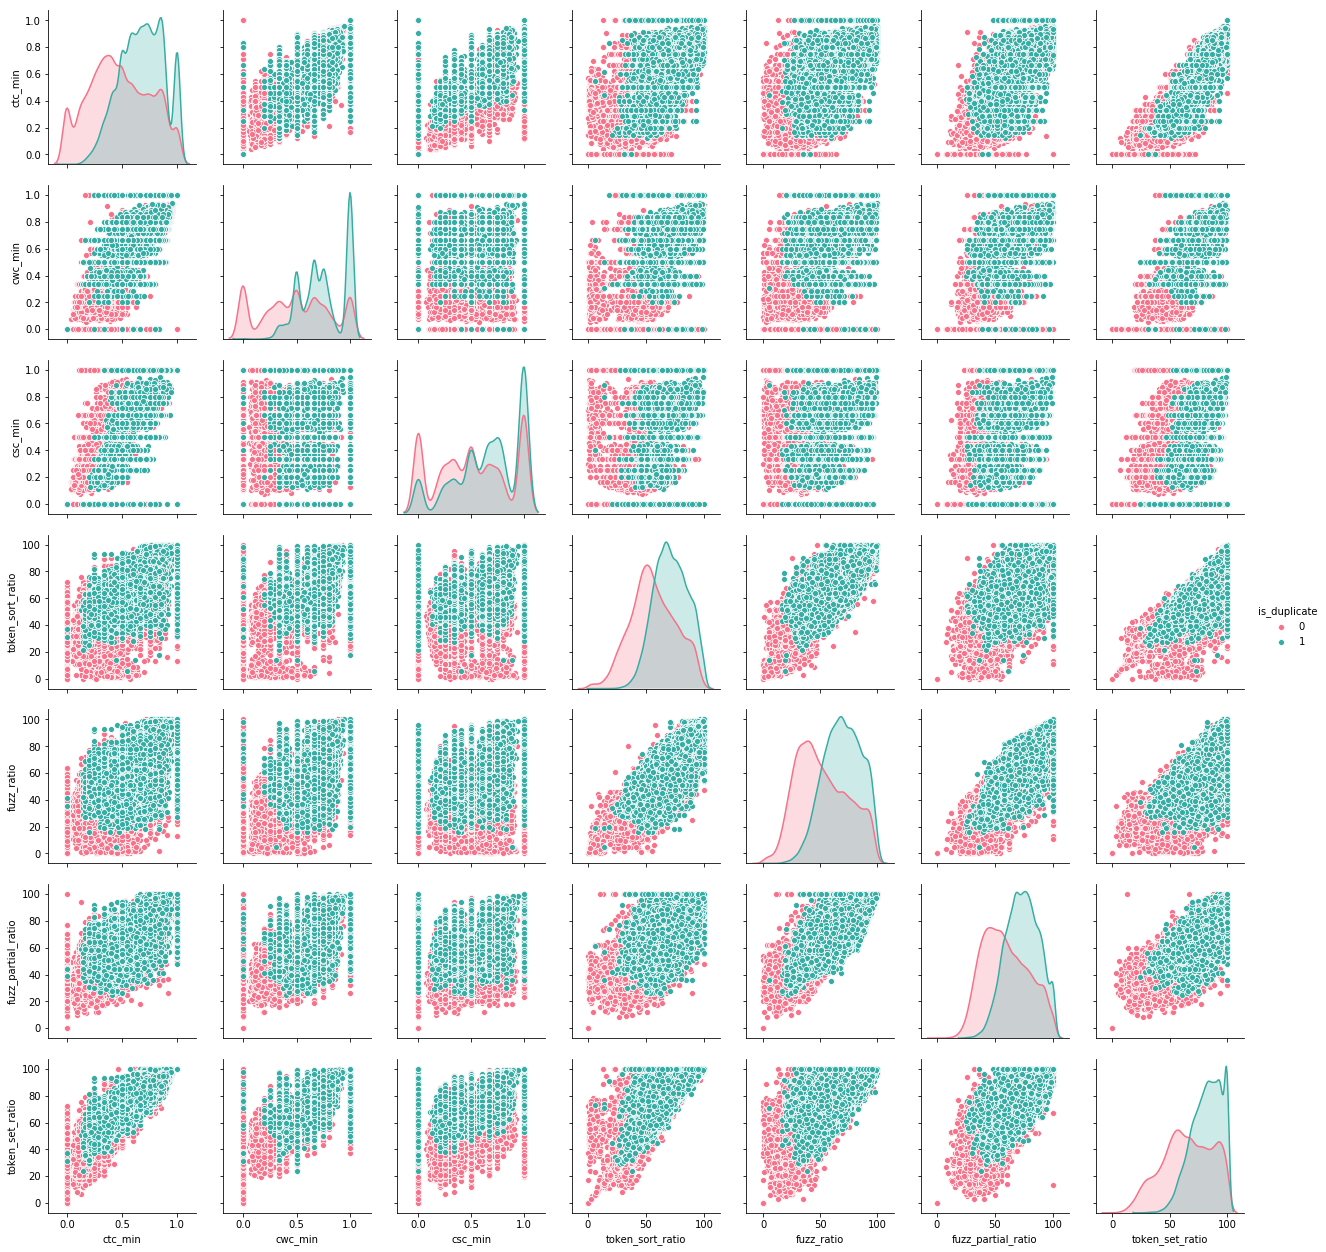

In [0]:
sbrn.pairplot(preProcessedData.iloc[0:50000], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_set_ratio'], palette = 'husl');
plt.show()

### 3.6.1.4 Analysis of some advanced features

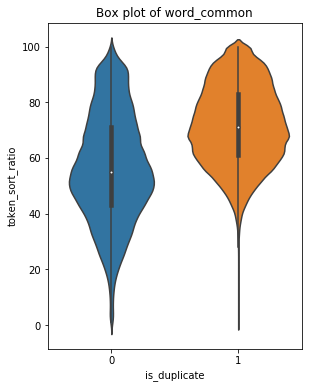

In [0]:
plt.figure(figsize=(10, 6));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = preProcessedData[0:]);
plt.title('Box plot of token sort ratio');
plt.show();

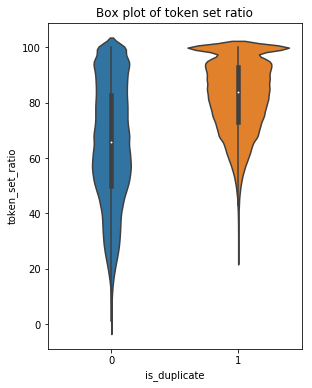

In [0]:
plt.figure(figsize=(10, 6));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'token_set_ratio', data = preProcessedData[0:]);
plt.title('Box plot of token set ratio');
plt.show();

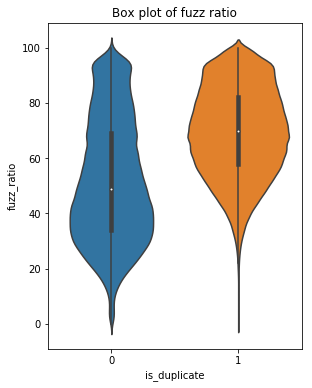

In [0]:
plt.figure(figsize=(10, 6));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = preProcessedData[0:]);
plt.title('Box plot of fuzz ratio');
plt.show();

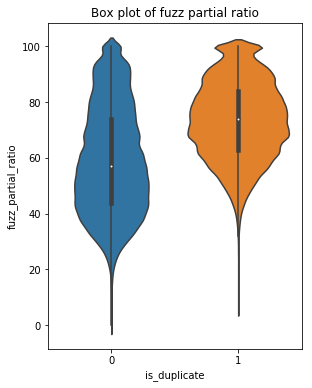

In [0]:
plt.figure(figsize=(10, 6));
plt.subplot(1, 2, 1);
sbrn.violinplot(x = 'is_duplicate', y = 'fuzz_partial_ratio', data = preProcessedData[0:]);
plt.title('Box plot of fuzz partial ratio');
plt.show();

## 3.7 Visualization

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.010s...
[t-SNE] Computed neighbors for 5000 samples in 0.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.115654
[t-SNE] Computed conditional probabilities in 0.172s
[t-SNE] Iteration 50: error = 86.7650757, gradient norm = 0.0509790 (50 iterations in 2.295s)
[t-SNE] Iteration 100: error = 74.6500931, gradient norm = 0.0108723 (50 iterations in 1.532s)
[t-SNE] Iteration 150: error = 72.4985733, gradient norm = 0.0075813 (50 iterations in 1.609s)
[t-SNE] Iteration 200: error = 71.4560928, gradient norm = 0.0065837 (50 iterations in 1.653s)
[t-SNE] Iteration 250: error = 70.8767776, gradient norm = 0.0039237

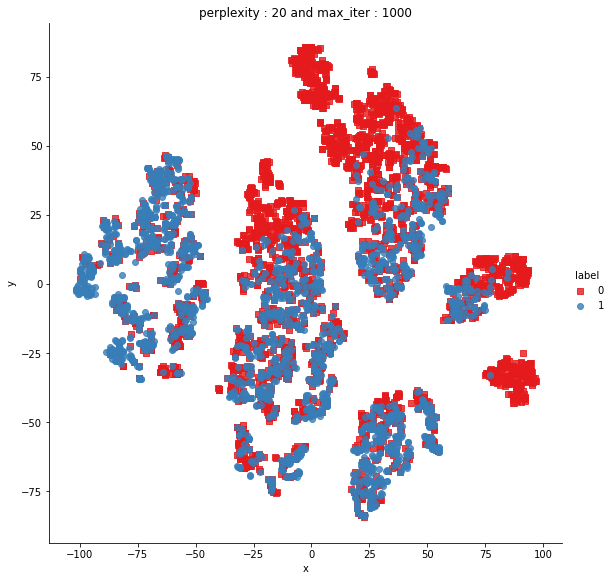

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.012s...
[t-SNE] Computed neighbors for 5000 samples in 0.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.254s
[t-SNE] Iteration 50: error = 81.2911148, gradient norm = 0.0457501 (50 iterations in 2.460s)
[t-SNE] Iteration 100: error = 70.6044159, gradient norm = 0.0086692 (50 iterations in 1.656s)
[t-SNE] Iteration 150: error = 68.9124908, gradient norm = 0.0056016 (50 iterations in 1.603s)
[t-SNE] Iteration 200: error = 68.1010742, gradient norm = 0.0047585 (50 iterations in 1.708s)
[t-SNE] Iteration 250: error = 67.5907974, gradient norm = 0.0033576

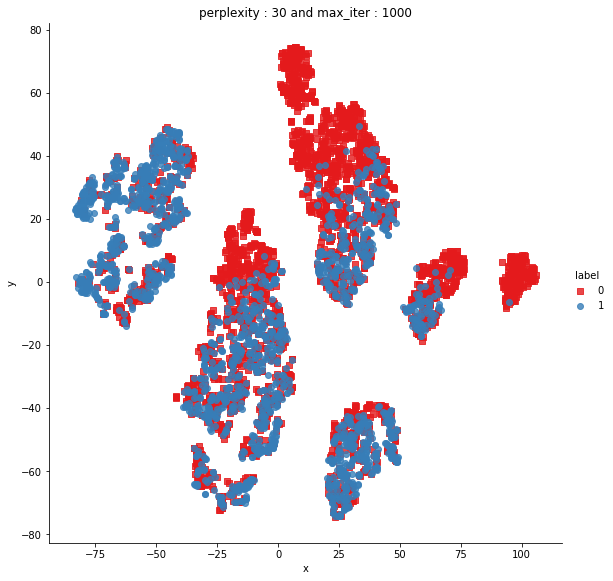

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 0.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.152133
[t-SNE] Computed conditional probabilities in 0.433s
[t-SNE] Iteration 50: error = 74.8604202, gradient norm = 0.0368117 (50 iterations in 2.613s)
[t-SNE] Iteration 100: error = 65.6472092, gradient norm = 0.0075237 (50 iterations in 1.828s)
[t-SNE] Iteration 150: error = 64.3109055, gradient norm = 0.0047423 (50 iterations in 1.734s)
[t-SNE] Iteration 200: error = 63.7060165, gradient norm = 0.0036326 (50 iterations in 1.692s)
[t-SNE] Iteration 250: error = 63.3259430, gradient norm = 0.002652

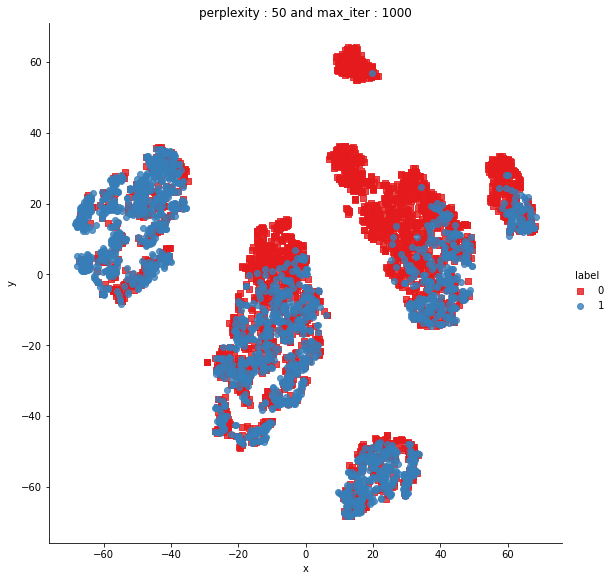

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.020s...
[t-SNE] Computed neighbors for 5000 samples in 0.544s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.176637
[t-SNE] Computed conditional probabilities in 0.647s
[t-SNE] Iteration 50: error = 69.2364044, gradient norm = 0.0323116 (50 iterations in 3.057s)
[t-SNE] Iteration 100: error = 61.3246727, gradient norm = 0.0075154 (50 iterations in 2.167s)
[t-SNE] Iteration 150: error = 60.1494522, gradient norm = 0.0047718 (50 iterations in 2.102s)
[t-SNE] Iteration 200: error = 59.6525536, gradient norm = 0.0032381 (50 iterations in 2.082s)
[t-SNE] Iteration 250: error = 59.3534813, gradient norm = 0.002385

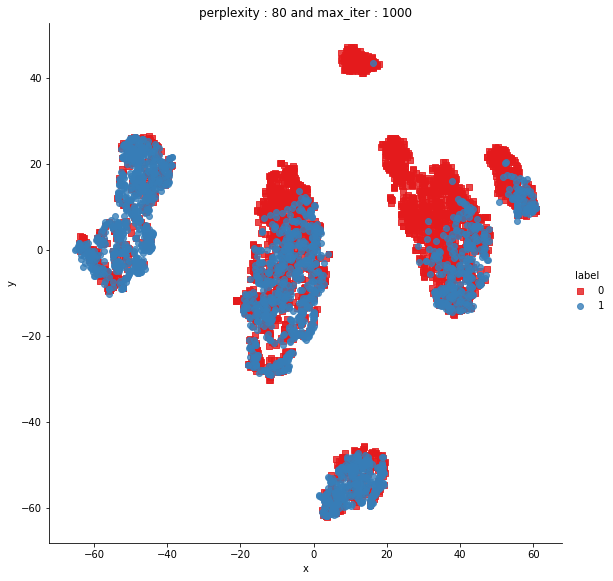

In [0]:
preProcessedSubSampled = preProcessedData.iloc[0:5000]
perplexities = [20, 30, 50, 80]
iterations = [1000]
X = MinMaxScaler().fit_transform(preProcessedSubSampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = preProcessedSubSampled['is_duplicate'].values
for perplexity in perplexities:
  for numIterations in iterations:
    tsneData = TSNE(n_components = 2, perplexity = perplexity, n_iter = numIterations, verbose = 2, random_state = 101, angle = 0.5)\
    .fit_transform(X);
    dataFrame = pd.DataFrame({'x': tsneData[:, 0], 'y': tsneData[:, 1], 'label': y});
    sbrn.lmplot(data=dataFrame, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
    plt.title("perplexity : {} and max_iter : {}".format(perplexity, numIterations))
    plt.show()

## 4. Building Machine Learning Models - Classification and Modelling

### 4.1 Names of all Basic and Advanced features 

In [0]:
numericalFeatures = ['freq_qid1', 'freq_qid2', 'q1len',	'q1_n_words', 	'q2_n_words', 	'word_common',	\
                                          'word_total',	'word_share',	'sum_freq',	'diff_freq',	'cwc_min', 'cwc_max',	\
                                          'csc_min',	'csc_max',	'ctc_min',	'ctc_max',	'last_word_eq',	\
                                          'first_word_eq',	'abs_len_diff',	'mean_len',	'fuzz_ratio',	'fuzz_partial_ratio',\
                                          'token_sort_ratio',	'token_set_ratio',	'longest_substr_ratio'];

In [0]:
# Utility function that is used to print eqaul signs
def equalsBorder(num):
  print("="*num);

### 4.2 Reading pre-processed data

In [0]:
preProcessedData = pd.read_csv('drive/My Drive/data_with_all_features.csv');
# Replacing nan points
preProcessedData.fillna('', inplace = True)

In [0]:
preProcessedData = preProcessedData[0:100000]
classesData = preProcessedData['is_duplicate']

### 4.3 Splitting data into train and test data

In [0]:
trainData, testData, classesTrain, classesTest = model_selection.train_test_split(preProcessedData, classesData);

In [0]:
questions1 = trainData['question1'];
questions2 = trainData['question2'];
questions = list(questions1) + list(questions2);
questions = pd.Series(questions).fillna("").tolist()

In [0]:
print("Training data shape: ", trainData.shape);
print("Test data shape: ", testData.shape)

Training data shape:  (75000, 32)
Test data shape:  (25000, 32)


### 4.4 Getting tf-idf vectors of question1 and question2

In [0]:
tfIdfVectorizer = TfidfVectorizer(lowercase = False, min_df = 5, max_features = 8000);
tfIdfTotalModel = tfIdfVectorizer.fit(questions);
tfIdfTrainQuestion1Model = tfIdfTotalModel.transform(trainData['question1']);
tfIdfTrainQuestion2Model = tfIdfTotalModel.transform(trainData['question2']);
tfIdfTestQuestion1Model = tfIdfTotalModel.transform(testData['question1']);
tfIdfTestQuestion2Model = tfIdfTotalModel.transform(testData['question2']);

In [0]:
print(tfIdfTrainQuestion1Model.shape)
print(tfIdfTrainQuestion2Model.shape)
print(tfIdfTestQuestion1Model.shape)
print(tfIdfTestQuestion2Model.shape)

(75000, 8000)
(75000, 8000)
(25000, 8000)
(25000, 8000)


### 4.5 Utility function for plotting results

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T) 
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sbrn.light_palette("blue")
    plt.subplot(1, 3, 1)
    sbrn.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sbrn.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sbrn.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### 4.6 Classification and Modelling using Logistic Regression

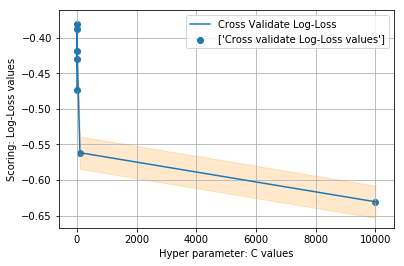

Results of analysis using Tf-Idf vectorized text merged with other features using logistic regression classifier: 
Optimal C Value:  1
Log-Loss obtained:  0.3301006674940123


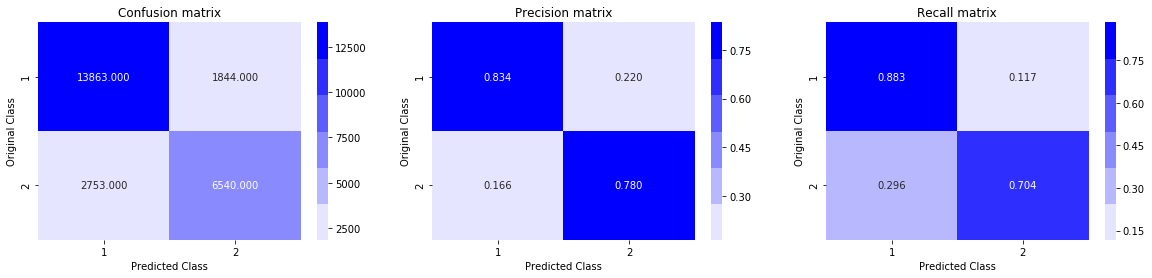

In [0]:
techniques = ['Tf-Idf'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((trainData[numericalFeatures],\
                              tfIdfTrainQuestion1Model,\
                              tfIdfTrainQuestion2Model))
    testMergedData = hstack((testData[numericalFeatures],\
                          tfIdfTestQuestion1Model,\
                          tfIdfTestQuestion2Model))
    
    lrClassifier = LogisticRegression(penalty = 'l2');
    tunedParameters = {'C': [0.0001, 0.01, 0.1, 1, 10, 100, 10000]};
    classifier = GridSearchCV(lrClassifier, tunedParameters, cv = 5, scoring = 'neg_log_loss', return_train_score = True);
    classifier.fit(trainingMergedData, classesTrain);
    
    crossValidateLogLossMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateLogLossStdValues = classifier.cv_results_['std_test_score'];
    
    plt.plot(tunedParameters['C'], crossValidateLogLossMeanValues, label = "Cross Validate Log-Loss");
    plt.scatter(tunedParameters['C'], crossValidateLogLossMeanValues, label = ['Cross validate Log-Loss values']);
    plt.gca().fill_between(tunedParameters['C'], crossValidateLogLossMeanValues - crossValidateLogLossStdValues, crossValidateLogLossMeanValues + crossValidateLogLossStdValues, alpha = 0.2, color = 'darkorange');
    plt.xlabel('Hyper parameter: C values');
    plt.ylabel('Scoring: Log-Loss values');
    plt.grid();
    plt.legend();
    plt.show();
    
    optimalHypParam1Value = classifier.best_params_['C'];
    lrClassifier = LogisticRegression(penalty = 'l2', C = optimalHypParam1Value);
    calibratedLrClassifier = CalibratedClassifierCV(base_estimator = lrClassifier, method = 'sigmoid');
    calibratedLrClassifier.fit(trainingMergedData, classesTrain);
    predProbScoresTraining = calibratedLrClassifier.predict_proba(trainingMergedData);
    predProbScoresTest = calibratedLrClassifier.predict_proba(testMergedData);
    
    print("Results of analysis using {} vectorized text merged with other features using logistic regression classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal C Value: ", optimalHypParam1Value);
    equalsBorder(40);
    print("Log-Loss obtained: ", log_loss(classesTrain, predProbScoresTraining))
    # Predicting classes of test data projects
    predictedScoresTest =np.argmax(predProbScoresTest,axis=1)
    equalsBorder(70);
    plot_confusion_matrix(classesTest, predictedScoresTest);

### 4.7 Classification and Modelling using Linear SVM(Support Vector Machines)

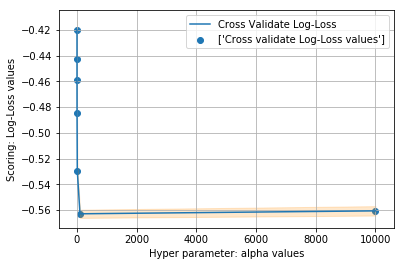

Results of analysis using Tf-Idf vectorized text merged with other features using simple vector machine classifier: 
Optimal alpha Value:  0.0001
Log-Loss obtained:  0.4011022912917552


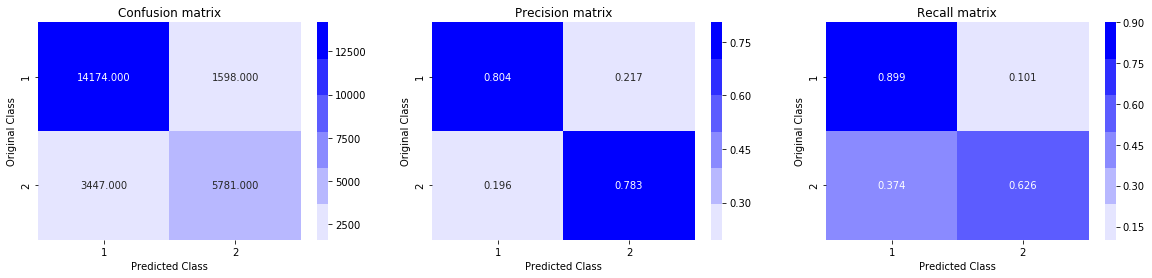

In [0]:
techniques = ['Tf-Idf'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((trainData[numericalFeatures],\
                              tfIdfTrainQuestion1Model,\
                              tfIdfTrainQuestion2Model))
    testMergedData = hstack((testData[numericalFeatures],\
                          tfIdfTestQuestion1Model,\
                          tfIdfTestQuestion2Model))
    tunedParameters = {'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 10000]};
    parameters = {};
    cv_results_ = {'mean_test_score': [], 'std_test_score': []}
    for alpha in tunedParameters['alpha']:
      svmClassifier = linear_model.SGDClassifier(loss = 'hinge', class_weight = 'balanced', alpha = alpha);
      calibratedSVMClassifier = CalibratedClassifierCV(base_estimator = svmClassifier, method = 'sigmoid');
      classifier = GridSearchCV(calibratedSVMClassifier, parameters, cv = 5, scoring = 'neg_log_loss', return_train_score = True);
      classifier.fit(trainingMergedData, classesTrain);
      cv_results_['mean_test_score'].append(classifier.cv_results_['mean_test_score'][0]);
      cv_results_['std_test_score'].append(classifier.cv_results_['std_test_score'][0]);
    
    crossValidateLogLossMeanValues = np.array(cv_results_['mean_test_score']);
    crossValidateLogLossStdValues = np.array(cv_results_['std_test_score']);
    
    plt.plot(tunedParameters['alpha'], crossValidateLogLossMeanValues, label = "Cross Validate Log-Loss");
    plt.scatter(tunedParameters['alpha'], crossValidateLogLossMeanValues, label = ['Cross validate Log-Loss values']);
    plt.gca().fill_between(tunedParameters['alpha'], crossValidateLogLossMeanValues - crossValidateLogLossStdValues, crossValidateLogLossMeanValues + crossValidateLogLossStdValues, alpha = 0.2, color = 'darkorange');
    plt.xlabel('Hyper parameter: alpha values');
    plt.ylabel('Scoring: Log-Loss values');
    plt.grid();
    plt.legend();
    plt.show();
    
    optimalHypParam1Value = tunedParameters['alpha'][np.argmax(cv_results_['mean_test_score'])];
    svmClassifier = linear_model.SGDClassifier(penalty = 'l2', alpha = optimalHypParam1Value);
    calibratedSVMClassifier = CalibratedClassifierCV(base_estimator = svmClassifier, method = 'sigmoid');
    calibratedSVMClassifier.fit(trainingMergedData, classesTrain);
    predProbScoresTraining = calibratedSVMClassifier.predict_proba(trainingMergedData);
    predProbScoresTest = calibratedSVMClassifier.predict_proba(testMergedData);
    
    print("Results of analysis using {} vectorized text merged with other features using simple vector machine classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal alpha Value: ", optimalHypParam1Value);
    equalsBorder(40);
    print("Log-Loss obtained: ", log_loss(classesTrain, predProbScoresTraining))
    # Predicting classes of test data projects
    predictedScoresTest =np.argmax(predProbScoresTest,axis=1)
    equalsBorder(70);
    plot_confusion_matrix(classesTest, predictedScoresTest);

### 4.8 Classification and Modelling using XGBoost classifier

In [0]:
techniques = ['Tf-Idf'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((trainData[numericalFeatures],\
                              tfIdfTrainQuestion1Model,\
                              tfIdfTrainQuestion2Model))
    testMergedData = hstack((testData[numericalFeatures],\
                          tfIdfTestQuestion1Model,\
                          tfIdfTestQuestion2Model))
    
    xgbClassifier = xgb.XGBClassifier(n_jobs = -1, subsample = 0.5, colsample_bytree = 0.5, scale_pos_weight = 0.18);
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
    max_depth = [int(x) for x in np.linspace(1, 15, num = 11)]
    learning_rate = [0.1, 0.3, 0.5, 0.8, 1]
    randomGrid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}
    randomizedClassifier = model_selection.RandomizedSearchCV(estimator = xgbClassifier, param_distributions = randomGrid, n_iter = 50,\
                                                             cv = 3, verbose = 2, random_state = 42, n_jobs = -1, scoring = 'neg_log_loss');
    randomizedClassifier.fit(trainingMergedData, classesTrain);

Cross-Validation log-loss values:  [-0.46354253 -0.39292984         nan -0.39544069         nan         nan
 -0.395027           nan -0.46670422         nan         nan -0.5251171
 -0.4097312  -0.52142295         nan -0.40541191         nan -0.52775884
         nan -0.52637842         nan         nan         nan -0.42953322
 -0.41391446         nan         nan         nan         nan         nan
 -0.47317275         nan         nan -0.41594824 -0.43417364 -0.39775328
 -0.55117891 -0.43684032         nan         nan         nan         nan
         nan -0.39575702 -0.43640452         nan         nan         nan
 -0.47607246         nan]
Results of analysis using Tf-Idf vectorized text merged with other features using xgb classifier: 
Optimal n_estimators Value:  1000
Optimal max_depth Value:  10
Optimal learning_rate Value:  0.1
Log-Loss obtained:  0.21042759616265444


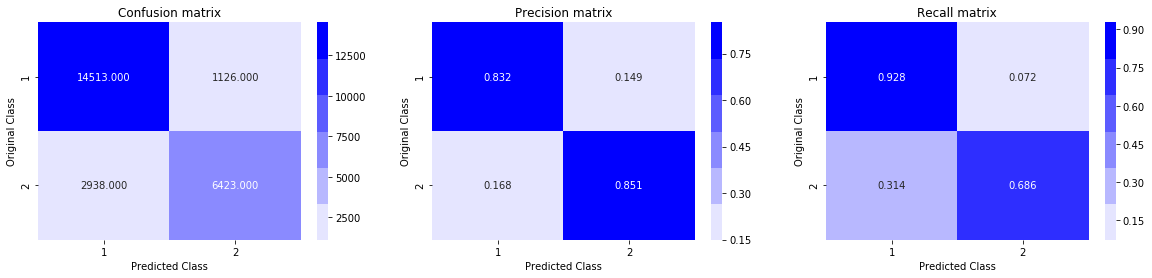

In [0]:
crossValidateLogLossMeanValues = randomizedClassifier.cv_results_['mean_test_score'];
crossValidateLogLossStdValues = randomizedClassifier.cv_results_['std_test_score'];

print("Cross-Validation log-loss values: ", crossValidateLogLossMeanValues);

bestnEstimatorsValue = randomizedClassifier.best_params_['n_estimators'];
bestMaxDepthValue = randomizedClassifier.best_params_['max_depth'];
bestLearningRate = randomizedClassifier.best_params_['learning_rate'];
xgbClassifier = xgb.XGBClassifier(n_jobs = -1, subsample = 0.5, colsample_bytree = 0.5, scale_pos_weight = 0.18,\
                                  n_estimators = bestnEstimatorsValue, max_depth = bestMaxDepthValue, learning_rate = bestLearningRate);
calibratedXgbClassifier = CalibratedClassifierCV(base_estimator = xgbClassifier, method = 'sigmoid');
calibratedXgbClassifier.fit(trainingMergedData, classesTrain);
predProbScoresTraining = calibratedXgbClassifier.predict_proba(trainingMergedData);
predProbScoresTest = calibratedXgbClassifier.predict_proba(testMergedData);

print("Results of analysis using {} vectorized text merged with other features using xgb classifier: ".format(technique));
equalsBorder(70);
print("Optimal n_estimators Value: ", bestnEstimatorsValue);
equalsBorder(40);
print("Optimal max_depth Value: ", bestMaxDepthValue);
equalsBorder(40);
print("Optimal learning_rate Value: ", bestLearningRate);
equalsBorder(40);
print("Log-Loss obtained: ", log_loss(classesTrain, predProbScoresTraining))
# Predicting classes of test data projects
predictedScoresTest =np.argmax(predProbScoresTest,axis=1)
equalsBorder(70);
plot_confusion_matrix(classesTest, predictedScoresTest);

In [0]:
randomizedClassifier.cv_results_

{'mean_fit_time': array([378.78425964, 497.29426527,  62.73680107, 723.41131798,
        207.04444965, 217.56564983, 328.12782868, 229.53342875,
         61.9110198 , 141.80131547, 275.99271464,  25.30663657,
        232.14649089,  15.92430099, 356.62201262, 225.19541494,
        151.97415837,  52.87771408, 614.7846427 ,  65.625868  ,
        317.30463147, 330.31284833, 148.03411714, 169.50435376,
        171.85903446, 346.69644133, 314.16766715, 430.93517868,
        307.08169293, 340.78479656,  52.3291804 ,  89.10496251,
        550.55231539, 187.73740013, 227.71800542, 360.29027271,
         28.5571514 , 257.38685815, 380.26118207, 468.4993368 ,
        566.00219727, 594.67460537,  89.96803061, 407.47827379,
        141.38916691, 287.48839402, 166.90396849, 372.54189618,
         91.41721233, 159.89126786]),
 'mean_score_time': array([ 5.49981658,  7.37178667,  1.45352483, 10.26466815,  3.33248782,
         3.37696123,  4.99671133,  3.51897883,  1.19838802,  2.40560285,
         4.4

## 5. Results

In [0]:
resultsDataFrame = pd.DataFrame()

In [0]:
resultsDataFrame = resultsDataFrame.append({'Estimator': 'Logistic Regression','Vectorizer': 'Tf-Idf','Hyper Parameters': 'C - 1', 'Log-Loss': '0.3301'}, ignore_index = True);
resultsDataFrame = resultsDataFrame.append({'Estimator': 'Linear SVM','Vectorizer': 'Tf-Idf','Hyper Parameters': 'Alpha - 0.0001','Log-Loss': '0.4011'}, ignore_index = True);
resultsDataFrame = resultsDataFrame.append({'Estimator': 'XGBoost','Vectorizer': 'Tf-Idf','Hyper Parameters': 'n_estimators-1000, max_depth-10, learning_rate-0.1','Log-Loss': '0.2104'}, ignore_index = True);

In [15]:
resultsDataFrame

Estimator  ... Vectorizer
0  Logistic Regression  ...     Tf-Idf
1           Linear SVM  ...     Tf-Idf
2              XGBoost  ...     Tf-Idf

[3 rows x 4 columns]

## 6. Conclusions

1. We have taken total 1,00,000 data points and out of them 75,000 were used for training and building model and this model is tested with 25,000 data points.
2. We can see  pair plots of some basic numerical features we have builded and there is more overlap and there is no such pair that can be used to build good model.
3. Even in the 2-dimensional visualization there is huge overlap and it seems we cannot build model in lower dimensions.
4. From the above results we can clearly see that using XGBoost classifier is the best choice as the log-loss obtained from this is significantly better than others.
5. We have used random search to tune hyper parameters for this XGBoost classifier and the best obtained when we have used 1000 estimators with max_depth = 10.
4. The advanced fuzzy features we have built helped some in decreasing log-loss and using tf-idf vectors is better than others.